In [1]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [2]:
!pip install kiwipiepy
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install wordcloud
!pip install Pillow --upgrade
!pip install numpy
!pip install xlrd
!pip install openpyxl
!pip install pandas
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
df_dic = pd.read_excel('C:/Users/wjh20/OneDrive/바탕 화면/역융세 자료/합본.xlsx')
print(df_dic[:100])

     단어    클래스
0    일본  항일+민족
1    민족  항일+민족
2    조선  항일+민족
3    독립  항일+민족
4    사람  항일+민족
..  ...    ...
95  러시아  항일+민족
96   국가  항일+민족
97   문명  항일+민족
98   학교  항일+민족
99   인민  항일+민족

[100 rows x 2 columns]


In [4]:
from kiwipiepy import Kiwi

kiwi = Kiwi()
wordList = df_dic.loc[:,["단어"]]
wordType = set()

wordsPOS = []
for i in range(0,len(wordList)):
    classWords = str(df_dic.loc[i,"클래스"])
    wordType.add(str(classWords))
    target = wordList.iloc[i,0]
    posTagout = kiwi.tokenize(target)
    # print(posTagout)
    wordPOS = ""
    for eachOut in posTagout:
        result = eachOut[0]+"/"+eachOut[1]
        wordPOS = result
        break
    wordPOS = wordPOS.strip()
    wordsPOS.append(wordPOS)
print(wordsPOS[:10])
print(wordType)

['일본/NNP', '민족/NNG', '조선/NNP', '독립/NNG', '사람/NNG', '세계/NNG', '나라/NNG', '일/NNG', '동포/NNG', '말/NNG']
{'비폭력(비무장)+평화', '폭력(무장)', '국제주의+세계적', '항일+민족', '공화정 국가 수립 + 개혁적'}


In [5]:
df_dic['품사태깅'] = wordsPOS
classWords = list(wordType)
print(df_dic[:100])
print(classWords)

     단어    클래스     품사태깅
0    일본  항일+민족   일본/NNP
1    민족  항일+민족   민족/NNG
2    조선  항일+민족   조선/NNP
3    독립  항일+민족   독립/NNG
4    사람  항일+민족   사람/NNG
..  ...    ...      ...
95  러시아  항일+민족  러시아/NNP
96   국가  항일+민족   국가/NNG
97   문명  항일+민족   문명/NNG
98   학교  항일+민족   학교/NNG
99   인민  항일+민족   인민/NNG

[100 rows x 3 columns]
['비폭력(비무장)+평화', '폭력(무장)', '국제주의+세계적', '항일+민족', '공화정 국가 수립 + 개혁적']


In [6]:
#감정들이 가지고 있는 단어 목록 확인하기
ontologyDic = {}
for eachClass in classWords:
    ontologyDic[eachClass] = list(df_dic[df_dic.클래스==eachClass]['품사태깅'])
    print(eachClass)
    print(list(df_dic[df_dic.클래스==eachClass]['품사태깅']))
print(ontologyDic)

비폭력(비무장)+평화
['간부/NNG', '부총장/NNG', '총애/NNG', '총리/NNG', '휴학/NNG', '연설회/NNG', '부합/NNG', '대한국민의회/NNP', '주교/NNG', '국경/NNG', '염치/NNG', '최/NNP', '주소/NNG', '분별/NNG', '일본사회당/NNP', '보답/NNG', '예배/NNG', '예법/NNG', '번창/NNG', '구/NNG', '번영/NNG', '번성/NNG', '전북/NNP', '꾀/NNG', '교환/NNG', '교토/NNP', '추/VV', '전신/NNG', '존망/NNG', '존경/NNG', '굴욕/NNG', '임용/NNG', '폭도/NNG', '약탈/NNG']
폭력(무장)
['법률/NNG', '지위/NNG', '필리핀/NNP', '대/NNB', '흐름/NNG', '인도주의/NNG', '집회/NNG', '박/NNP', '학대/NNG', '파견/NNG', '신음/NNG', '한/MM', '속임수/NNG', '평양/NNP', '기대/NNG', '살해/NNG', '도령/NNG', '태도/NNG', '기세/NNG', '비참/NNG', '주먹/NNG', '식민지/NNG', '매일신보/NNP', '도장/NNG', '상황/NNG', '구속/NNG', '털끝/NNG', '요즘/NNG', '영구/NNP', '장래/NNG', '보통학교/NNG', '병력/NNG', '태상/NNP', '대륙/NNG', '허용/NNG', '은혜/NNG', '복/NNG', '선비/NNG', '존중/NNG', '대사/NNG', '대동단/NNP', '감독/NNG', '시민/NNG', '법/NNG', '노인/NNG', '이해/NNG']
국제주의+세계적
['지/EC', '출병/NNG', '이탈리아/NNP', '배포/NNG', '약소민족/NNG', '배신/NNG', '조화/NNG', '계승/NNG', '중간/NNG', '꼴/NNG', '전부/MAG', '추밀부/NNG', '종족/NNG', '한미/NNP', '비준/NNG', '인사/NNG',

In [7]:
#단어-감정 사전 만들기
wordOntologyDic = {}
for i in range(0,len(df_dic)):
    wordOntologyDic[df_dic.loc[i,"품사태깅"]] = df_dic.loc[i,"클래스"]
print(wordOntologyDic)

{'일본/NNP': '항일+민족', '민족/NNG': '항일+민족', '조선/NNP': '항일+민족', '독립/NNG': '항일+민족', '사람/NNG': '항일+민족', '세계/NNG': '항일+민족', '나라/NNG': '항일+민족', '일/NNG': '항일+민족', '동포/NNG': '항일+민족', '말/NNG': '항일+민족', '자유/NNG': '항일+민족', '일본인/NNG': '항일+민족', '평화/NNG': '항일+민족', '하늘/NNG': '항일+민족', '정부/NNG': '항일+민족', '마음/NNG': '항일+민족', '조선인/NNG': '항일+민족', '행동/NNG': '항일+민족', '국민/NNG': '항일+민족', '생각/NNG': '항일+민족', '한국/NNP': '항일+민족', '정의/NNG': '항일+민족', '때/NNG': '항일+민족', '가운데/NNG': '항일+민족', '만세/IC': '항일+민족', '피/NNG': '항일+민족', '회의/NNG': '항일+민족', '아래/NNG': '항일+민족', '역사/NNG': '항일+민족', '백성/NNG': '항일+민족', '동안/NNG': '항일+민족', '자신/NNG': '항일+민족', '정신/NNG': '항일+민족', '운동/NNG': '항일+민족', '앞/NNG': '항일+민족', '소리/NNG': '항일+민족', '미국/NNP': '항일+민족', '나/NP': '항일+민족', '원수/NNG': '항일+민족', '대표/NNG': '항일+민족', '시대/NNG': '항일+민족', '이번/NNG': '항일+민족', '과거/NNG': '항일+민족', '생명/NNG': '항일+민족', '이상/NNG': '항일+민족', '세상/NNG': '항일+민족', '전쟁/NNG': '항일+민족', '동양/NNG': '항일+민족', '선언/NNG': '항일+민족', '후/IC': '항일+민족', '힘/NNG': '항일+민족', '뜻/NNG': '항일+민족', '속/NNG': '항일+민족', '형

In [8]:
# 데이터 불러오기
import re

fileDir = "C:/Users/wjh20/OneDrive/바탕 화면/역융세 자료/전체.txt"
fr = open(fileDir, 'r', encoding='utf-8')
contents = fr.readlines()
fr.close()

reviewList = []
for content in contents:
    content = re.sub('[^가-힣]', ' ', content).replace("\n","")
    content = re.sub('[\s]+', ' ', content).strip()
    if content == "" or content == " ":
        pass
    else:
        reviewList.append(content)

for eachReview in reviewList:
    print(eachReview)

조선독립신문
신문사장 윤익선
조선 민족 대표 손병희 김병조씨 외 인이 조선 건국 년 월 일 오후 시에 조선독립선언서를 경성 태화관 안에서 발표하였으며 이후 동 대표 여러분은 종로경찰서에 끌려갔다고 한다
민족 대표 여러분들의 부탁 조선 민족 대표 여러분들이 마지막 한 마디 말을 동지들에게 남겼다고 하는데 그 내용은 다음과 같다 우리들은 조선을 위하여 우리의 생명을 기꺼이 희생물로 바치고자 하니 우리 신성한 형제들께서는 우리들의 뜻을 관철하여 주시오 어느 해 어느 날까지라도 우리 이천만 민족이 마지막 한 사람이 남더라도 난폭한 행동이나 파괴적 행동은 결단코 하지 마시오 한 사람이라도 난폭한 파괴 행동을 하게 되면 그것은 조선을 영원히 구하지 못하게 만들 것이니 대단히 주의하고 절대로 신중함을 지키시오
전 국민의 반향 월 일 민족 대표 여러분이 끌려가는 것과 동시에 전 국민이 민족 대표들의 뜻을 관철하기 위하여 일제히 행동에 들어갔다고 한다
조선 건국 년 월 일
합병 이후의 사정
여러 해에 걸친 세계의 참화가 이제 비로소 그치게 됨에 따라 하늘의 때 와 사람 사이의 관계 가 모두 새 봄을 맞이하였음을 세계가 함께 경축하고 있습니다 또한 정의와 인도를 표방한 연합군이 최종적으로 승리를 거둔 덕택에 모든 인류의 완전한 행복을 목표로 하는 세계적인 대개조가 장차 이루어지려고 하고 있고 위력에 희생된 자들에게는 무한한 희망과 힘과 용기를 주고 있습니다 점점 도의가 폭력을 대신하기 시작하고 이상이 현실적인 힘을 얻게 되는 것이 분명해진 이상 앞으로 세계에서는 일체의 난폭하고 사나운 억압과 구차한 순종이 더 이상 존재할 수 없게 되었습니다
이제 예전부터 내려오는 관습에 얽매여 있는 정치가들의 공명심 때문에 잘못 만들어진 조선과 일본 두 민족 사이의 부자유스럽고 불합리한 상태를 근본적으로 개선해야 할 시기에 도달하였습니다 안으로는 매일같이 커져가고 있는 서로 간의 원한과 불화를 제거하고 밖으로는 누구도 가로막지 못할 세계의 대세에 순응하는 것이야 말로 필연적인 시대적 방향입니다

<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
C:\Users\wjh20\AppData\Local\Temp\ipykernel_60436\2909190007.py:12: SyntaxWarning: invalid escape sequence '\s'
  content = re.sub('[\s]+', ' ', content).strip()


In [9]:
from kiwipiepy import Kiwi
import re

kiwi = Kiwi()
#품사태깅된 문장
reviewPOSList = []
#단어의 타입 확인
wordType = set()
sentencePOSAll = []
sentencePOSContent = []
sentencePOSTextAll = ""

MWEsList = open('C:/Users/wjh20/OneDrive/바탕 화면/역융세 자료/복합어 사전.txt', encoding='UTF-8').readlines()

for eachReview in reviewList:
    #띄어쓰기
    eachReviewSpace = kiwi.space(eachReview)
    #문장 분할
    eachReviewSpaceSentences = kiwi.split_into_sents(eachReviewSpace)
    for sentence in eachReviewSpaceSentences:
        content = sentence.text
        #품사태깅
        for i in range(0,len(MWEsList)):
            eachMWEs = MWEsList[i].replace("\n","").strip()
            content = content.replace(eachMWEs, eachMWEs.replace(" ","_"))
        posTagout = kiwi.tokenize(content)
        sentencePOS = ''
        for eachOut in posTagout:
            if "NN" in eachOut[1] :
                if "_" in eachOut[0]:
                    resultContent = eachOut[0]+"/MWEs"
                else:
                    resultContent = eachOut[0] + "/" + eachOut[1]
                sentencePOSContent.append(resultContent)
            if "_" in eachOut[0]:
                result = eachOut[0] + "/MWEs"
            else:
                result = eachOut[0] + "/" + eachOut[1]
            sentencePOS = sentencePOS + " " + result
            sentencePOSAll.append(result)
            if result != "":
                wordType.add(result)
            sentencePOSTextAll = sentencePOSTextAll + " " + eachOut[0]
        sentencePOS = sentencePOS.strip()
#         sentencePOSAll = sentencePOSAll + " " + sentencePOS
        reviewPOSList.append(sentencePOS)

sentencePOSTextAll = sentencePOSTextAll.strip()

print(sentencePOSContent[:20])
print(sentencePOSAll[:20])
print(wordType)
print(len(wordType))
print(reviewPOSList[:10])
print(len(reviewPOSList))

['조선독립신문/NNP', '신문/NNG', '사장/NNG', '윤익선/NNP', '조선/NNP', '민족/NNG', '대표/NNG', '손병희/NNP', '김병조/NNP', '씨/NNB', '외/NNB', '인/NNG', '조선/NNP', '건국/NNG', '년/NNB', '월/NNG', '일/NNG', '오후/NNG', '시/NNB', '조선/NNP']
['조선독립신문/NNP', '신문/NNG', '사장/NNG', '윤익선/NNP', '조선/NNP', '민족/NNG', '대표/NNG', '손병희/NNP', '김병조/NNP', '씨/NNB', '외/NNB', '인/NNG', '이/JKS', '조선/NNP', '건국/NNG', '년/NNB', '월/NNG', '일/NNG', '오후/NNG', '시/NNB']
{'봉제/NNG', '보/VV', '가히/MAG', '아성/NNG', '군사력/NNG', '악화/NNG', '성취/NNG', '아웅/MAG', '원료/NNG', '사회/NNG', '개척/NNG', '아들/NNG', '행사/NNG', '목격/NNG', '기술자/NNG', '생사/NNG', '벌써/MAG', '선린/NNG', '정의/NNG', '선포/NNG', '파도/NNG', '가장/NNG', '수탈/NNG', '일으키/VV', '으리라는/ETM', '철/NNG', '충분히/MAG', '소환/NNG', '두텁/VA-I', '버겁/VA-I', '뽐내/VV', '바로/MAG', '제/MM', '몇몇/MM', '수/NNB', '소요/NNG', '회계/NNG', '감회/NNG', '고소/NNG', '비웃/VV-R', '억/IC', '조절/NNG', '낮추/VV', '이야기/NNG', '삼십/NR', '보배/NNG', '일어서/VV', '텅/MAG', '비대/NNG', '개혁안/NNG', '마수/NNG', '허공/NNG', '차별/NNG', '위력/NNG', '쓸쓸/XR', '희/NNG', '떠맡/VV', '환영/NNG', '박하/VA', '영토/NNG', '김도연/

<Axes: xlabel='n', ylabel='word'>

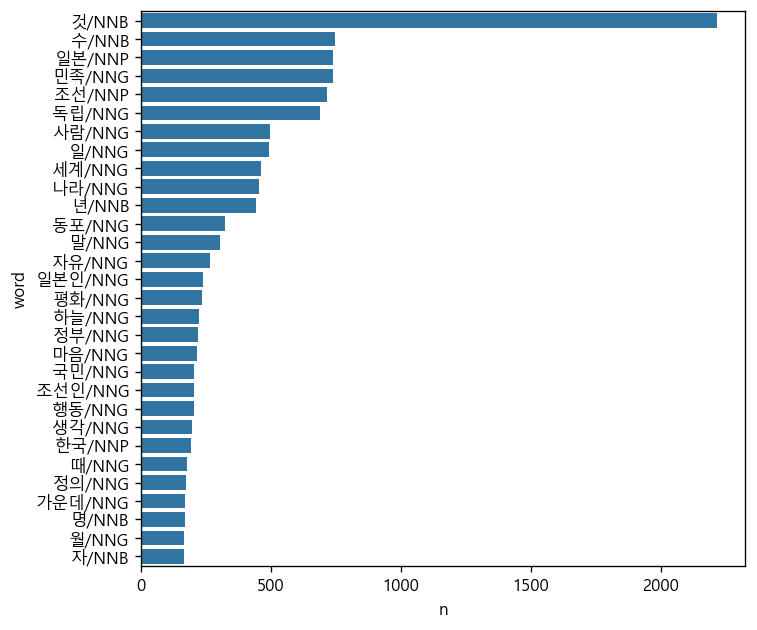

In [10]:
import pandas as pd
df_words = pd.DataFrame({'word':sentencePOSContent})

# 단어의 글자수 변수 추가하기
df_words['count'] = df_words['word'].str.len()

#글자수가 2이상인 단어들만 남기기
df_words = df_words.query('count >= 2')

#단어들의 등장 빈도수 확인하기
#단어 별로 분리하기
df_words = df_words.groupby('word', as_index = False)
#빈도 계산하기
df_words = df_words.agg(n=('word', 'count'))
#내림차수으로 정렬하기
df_words = df_words.sort_values('n', ascending = False)

top30 = df_words.head(30)

import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update({'font.family':'NanumBarunGothic'})
plt.rcParams.update({'font.family':'Malgun Gothic'})
plt.rcParams.update({'figure.dpi':'120'})
plt.rcParams.update({'figure.figsize':[6.5,6]})

sns.barplot(data = top30, y = 'word', x = 'n')

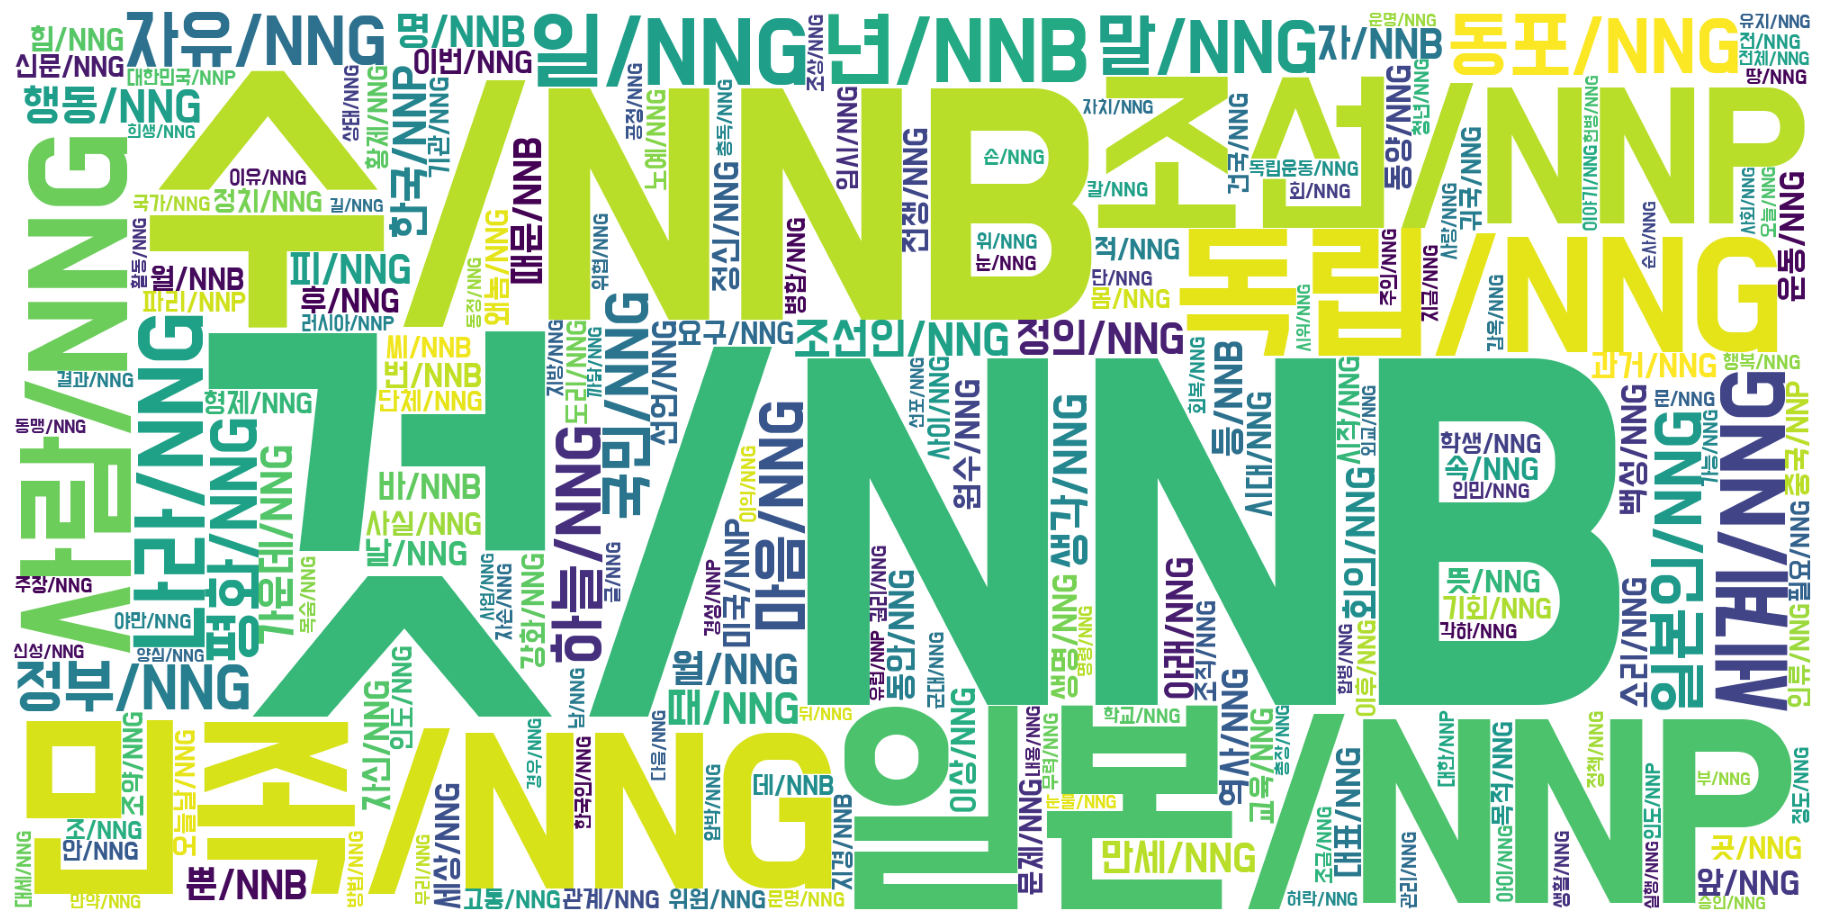

In [11]:
#현재의 데이터 딕셔너리로 변환하기
df_words_dic = df_words.set_index('word').to_dict()['n']

from wordcloud import WordCloud
from PIL import Image # 만약 "No module named 'PIL'" 에러가 발생하면 [ pip install Pillow==5.4.1 ] 로 라이브러리를 설치
import numpy as np
import matplotlib.pyplot as plt

#font = '/Users/seongminmun/opt/anaconda3/pkgs/notebook-6.4.5-py39hecd8cb5_0/lib/python3.9/site-packages/notebook/static/components/MathJax/fonts/DoHyeon-Regular.ttf'
font = 'C:/Users/wjh20/OneDrive/바탕 화면/역융세 자료/DoHyeon-Regular.ttf'
word_cloud = WordCloud(font_path = font,
                       width = 2000, height = 1000,
                       background_color='white')

word_cloud.generate_from_frequencies(df_words_dic)

plt.figure(figsize=(15,15))
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [12]:
import pandas as pd
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))
# 0으로 이루어진 단어 행렬 생성 (초기값)
matrixCorpus = pd.DataFrame(0.0, index=classWords, columns=documentIndex)
print(matrixCorpus)

for i in range(0,len(reviewPOSList)):
    sentence = reviewPOSList[i]
    words = sentence.split(" ")
    # print(words)
    for j in range(0,len(words)):
        if words[j] != '':
            #리뷰에서 사용된 단어가 온톨로지에 존재하는 경우 카운트
            if words[j] in wordOntologyDic:
                matrixCorpus[str(i)][wordOntologyDic[words[j]]] += 1.0
            else:
                pass

print(matrixCorpus)

                   0    1    2    3    4    5    6    7    8    9  ...  5430  \
비폭력(비무장)+평화      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
폭력(무장)           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
국제주의+세계적         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
항일+민족            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
공화정 국가 수립 + 개혁적  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   

                 5431  5432  5433  5434  5435  5436  5437  5438  5439  
비폭력(비무장)+평화       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
폭력(무장)            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
국제주의+세계적          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
항일+민족             0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
공화정 국가 수립 + 개혁적   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 5440 columns]


C:\Users\wjh20\AppData\Local\Temp\ipykernel_60436\3595135074.py:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  matrixCorpus[str(i)][wordOntologyDic[words[j]]] += 1.0


                   0    1     2     3     4    5    6     7     8     9  ...  \
비폭력(비무장)+평화      0.0  0.0   0.0   0.0   0.0  0.0  0.0   0.0   0.0   0.0  ...   
폭력(무장)           0.0  0.0   0.0   3.0   0.0  0.0  0.0   0.0   0.0   0.0  ...   
국제주의+세계적         0.0  0.0   3.0   5.0   1.0  1.0  0.0   0.0   1.0   1.0  ...   
항일+민족            1.0  1.0  15.0  31.0  12.0  2.0  4.0  11.0  24.0  22.0  ...   
공화정 국가 수립 + 개혁적  0.0  0.0   0.0   0.0   0.0  0.0  0.0   0.0   0.0   0.0  ...   

                 5430  5431  5432  5433  5434  5435  5436  5437  5438  5439  
비폭력(비무장)+평화       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
폭력(무장)            0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0  
국제주의+세계적          0.0   0.0   2.0   0.0   1.0   3.0   0.0   1.0   0.0   1.0  
항일+민족             6.0   1.0   7.0   4.0  19.0  13.0  10.0   6.0   1.0   1.0  
공화정 국가 수립 + 개혁적   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 5440 columns]


In [13]:
import pandas as pd
from math import log

# N = len(reviewPOSList)
# matrix = matrixEmotion
# t = print(emotions)

def emotion_idf(t,N,matrix):
    df = 0
    for i in range(0,len(matrix.columns)):
        each = matrix.loc[:,str(i)]
        if each.loc[t] != 0.0:
            df += 1
    return log(N/(df+1))

def emotion_tfidf(t,N,matrix):
    df = 0
    for i in range(0,len(matrix.columns)):
        each = matrix.loc[:,str(i)]
        if each.loc[t] != 0.0:
            df += 1
    return log(N/(df+1))

In [14]:
outCome = []

for i in range(0, len(classWords)):
    target = classWords[i]
    outCome.append(emotion_idf(target, len(reviewPOSList), matrixCorpus))

class_idf_out = pd.DataFrame(outCome, index=classWords, columns=["IDF"])

tfidfTotal = []
for i in range(0, len(classWords)):
    tfidf = []
    for j in range(0,len(matrixCorpus.columns)):
        each = matrixCorpus.loc[:,str(j)]
        tfidf.append(float(each.loc[classWords[i]] * class_idf_out.loc[classWords[i]]))
    tfidfTotal.append(tfidf)

documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))

corpus_tfidf_out = pd.DataFrame(tfidfTotal, index=classWords, columns = documentIndex)
print(corpus_tfidf_out)

C:\Users\wjh20\AppData\Local\Temp\ipykernel_60436\3386013984.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  tfidf.append(float(each.loc[classWords[i]] * class_idf_out.loc[classWords[i]]))


                        0         1         2         3         4         5  \
비폭력(비무장)+평화      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
폭력(무장)           0.000000  0.000000  0.000000  5.615131  0.000000  0.000000   
국제주의+세계적         0.000000  0.000000  2.423843  4.039738  0.807948  0.807948   
항일+민족            0.074787  0.074787  1.121804  2.318395  0.897443  0.149574   
공화정 국가 수립 + 개혁적  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

                        6         7         8         9  ...      5430  \
비폭력(비무장)+평화      0.000000  0.000000  0.000000  0.000000  ...  0.000000   
폭력(무장)           0.000000  0.000000  0.000000  0.000000  ...  0.000000   
국제주의+세계적         0.000000  0.000000  0.807948  0.807948  ...  0.000000   
항일+민족            0.299148  0.822656  1.794886  1.645313  ...  0.448722   
공화정 국가 수립 + 개혁적  0.000000  0.000000  0.000000  0.000000  ...  0.000000   

                     5431      5432      5433      5434      5435      5436  \
비

In [15]:
corpus_tfidf_out.to_csv("C:/Users/wjh20/OneDrive/바탕 화면/역융세 자료/output/확인.csv")

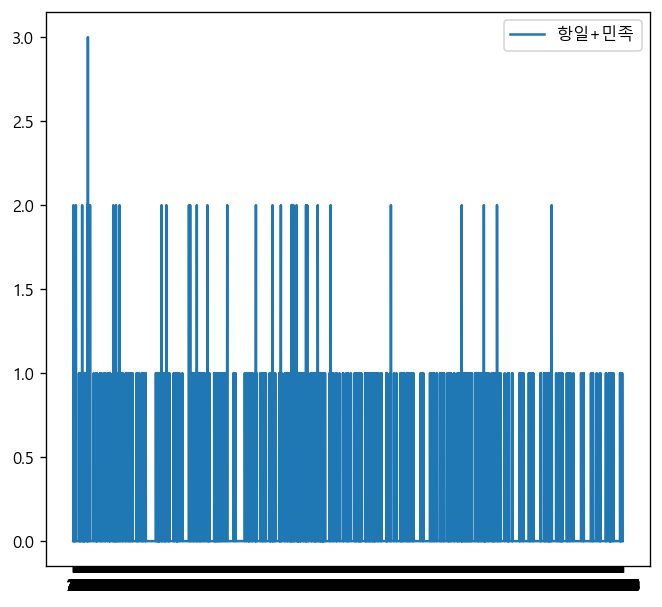

In [16]:
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))

targetWords = classWords
class1 = []
for i in range(0,len(documentIndex)):
    class1.append(int(corpus_tfidf_out[str(i)]['항일+민족']))

#라인 그래프
#그래프로 표현하기
import matplotlib.pyplot as plt

# 배우
plt.plot(documentIndex, class1, label = '항일+민족')
plt.legend()
plt.show()

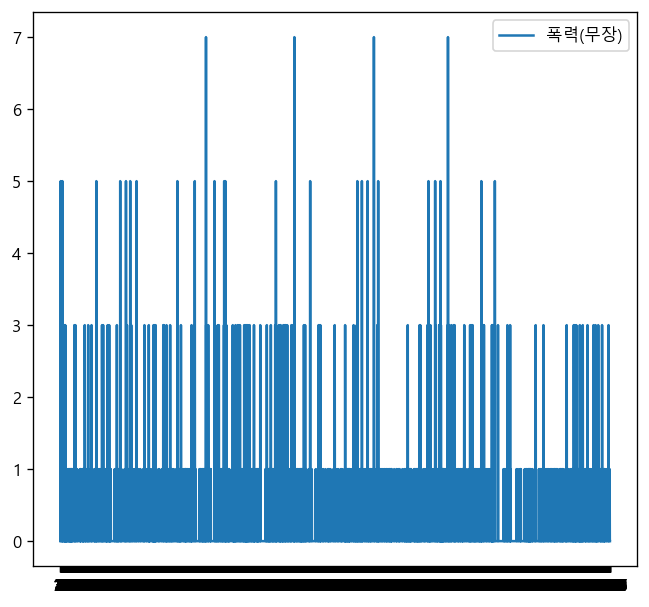

In [17]:
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))

targetWords = classWords
class1 = []
for i in range(0,len(documentIndex)):
    class1.append(int(corpus_tfidf_out[str(i)]['폭력(무장)']))

#라인 그래프
#그래프로 표현하기
import matplotlib.pyplot as plt

# 배우
plt.plot(documentIndex, class1, label = '폭력(무장)')
plt.legend()
plt.show()

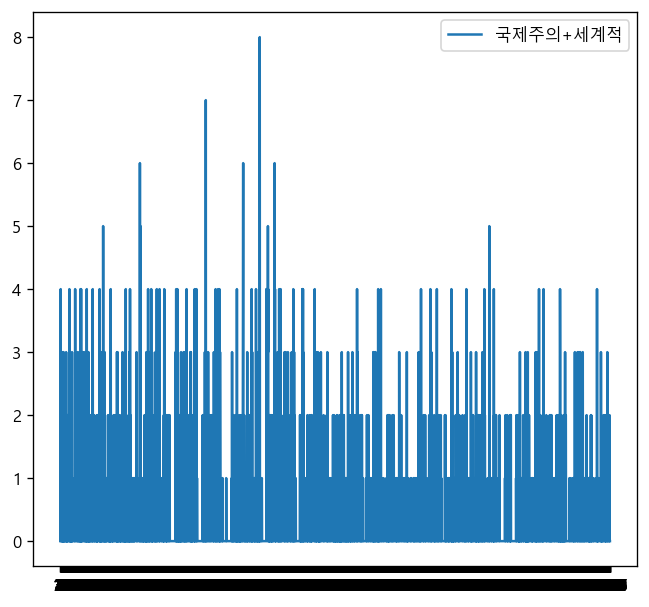

In [18]:
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))

targetWords = classWords
class1 = []
for i in range(0,len(documentIndex)):
    class1.append(int(corpus_tfidf_out[str(i)]['국제주의+세계적']))

#라인 그래프
#그래프로 표현하기
import matplotlib.pyplot as plt

# 배우
plt.plot(documentIndex, class1, label = '국제주의+세계적')
plt.legend()
plt.show()

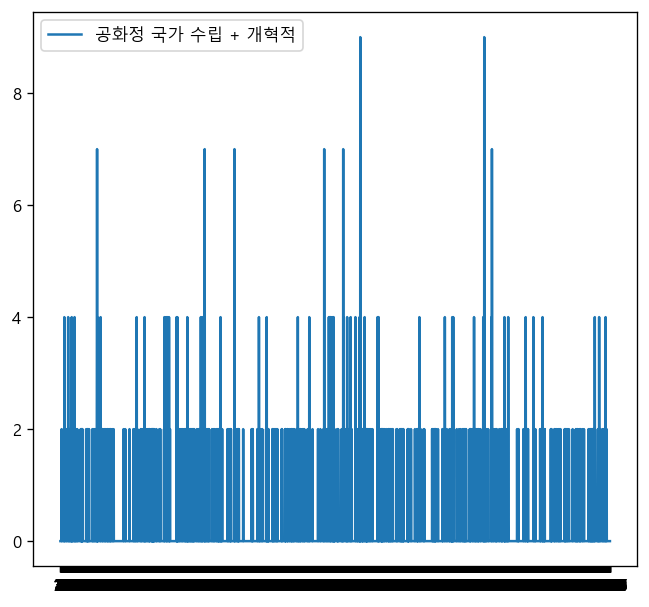

In [19]:
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))

targetWords = classWords
class1 = []
for i in range(0,len(documentIndex)):
    class1.append(int(corpus_tfidf_out[str(i)]['공화정 국가 수립 + 개혁적']))

#라인 그래프
#그래프로 표현하기
import matplotlib.pyplot as plt

# 배우
plt.plot(documentIndex, class1, label = '공화정 국가 수립 + 개혁적')
plt.legend()
plt.show()

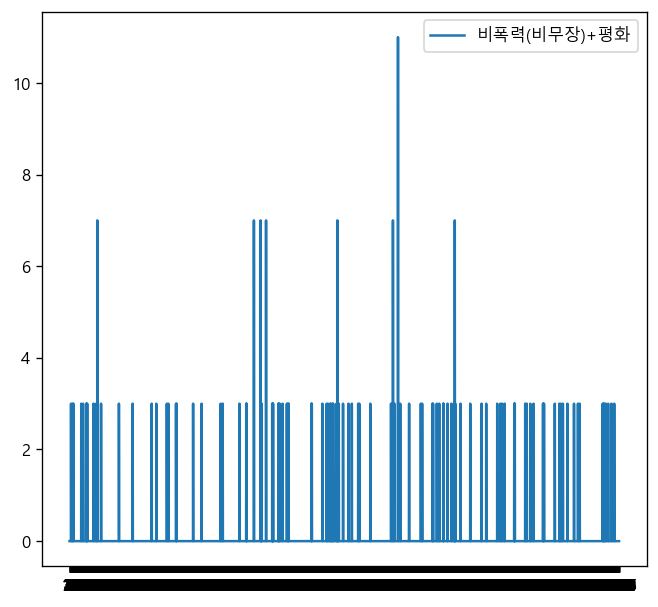

In [20]:
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))

targetWords = classWords
class1 = []
for i in range(0,len(documentIndex)):
    class1.append(int(corpus_tfidf_out[str(i)]['비폭력(비무장)+평화']))

#라인 그래프
#그래프로 표현하기
import matplotlib.pyplot as plt

# 배우
plt.plot(documentIndex, class1, label = '비폭력(비무장)+평화')
plt.legend()
plt.show()

<Axes: xlabel='words', ylabel='freq'>

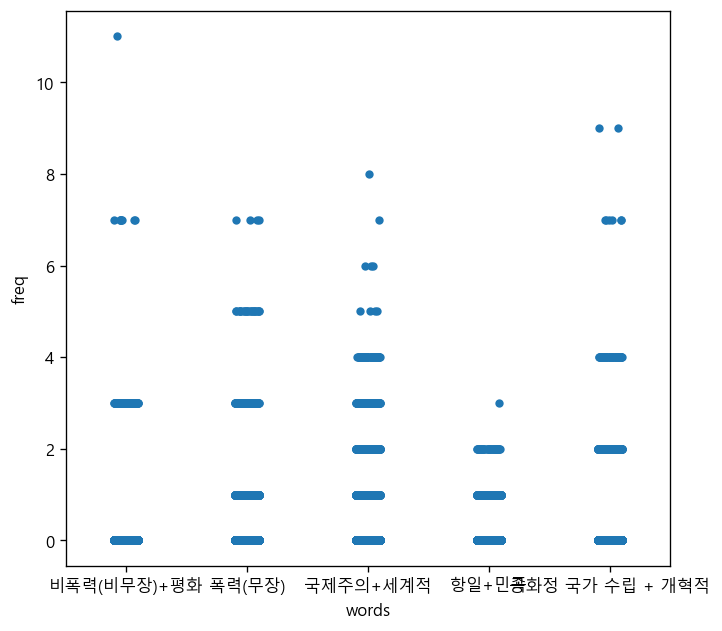

In [21]:
# 스트립 플롯 그리기
def dataRefinedForPlot(matrix, xIndex, listWords):
    import pandas as pd
    freq = []
    words = []
    for eachWord in listWords:
        for i in range(0,len(xIndex)):
            freq.append(int(matrix[str(i)][eachWord]))
            words.append(eachWord)
    refinedDF = pd.DataFrame({'words':words,'freq':freq})
    return refinedDF

inputDF = dataRefinedForPlot(corpus_tfidf_out, documentIndex, targetWords)

#스트립플롯은 데이터를 점으로 찍어 나타낸 그래프이다
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family':'NanumBarunGothic'})
plt.rcParams.update({'font.family':'Malgun Gothic'})
plt.rcParams.update({'figure.dpi':'120'})
plt.rcParams.update({'figure.figsize':[6.5,6]})


sns.stripplot(x='words', y='freq', data=inputDF)

<Axes: xlabel='words', ylabel='freq'>

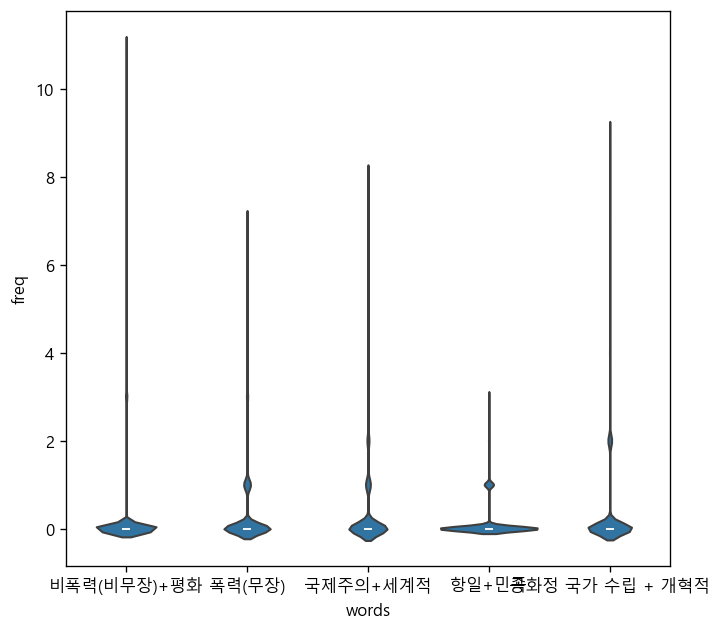

In [22]:
#바이올릿 차트
sns.violinplot(x='words', y='freq', data=inputDF)

<Axes: xlabel='words', ylabel='freq'>

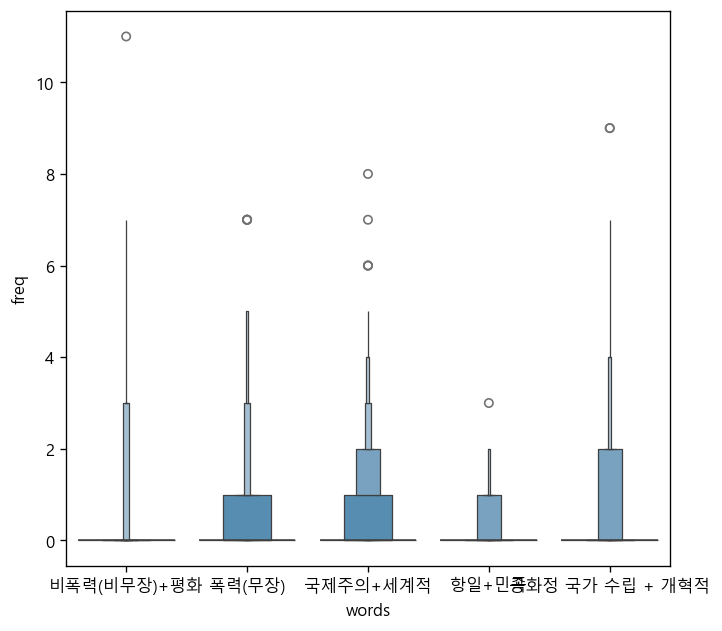

In [23]:
#박슨 플롯
sns.boxenplot(x='words', y='freq', data=inputDF)